# Problem Statement

NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases.

The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
Build a model to accurately predict whether the patients in the dataset have diabetes or not.

# Solution:

#### Submitted By: Riddhi Tokdar

# 1.Importing Necessary Libraries

In [ ]:
# libraries for EDA and Visualisation
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report,f1_score
from sklearn.metrics import auc, plot_roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score, recall_score
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
sns.set_style('darkgrid')

# 2. Data Understanding and Cleaning 

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#load the data
df=pd.read_csv('/content/drive/MyDrive/ML_Projects/Data/health care diabetes.csv')

In [ ]:
#check the data
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#sample of data
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
693,7,129,68,49,125,38.5,0.439,43,1
736,0,126,86,27,120,27.4,0.515,21,0
734,2,105,75,0,0,23.3,0.560,53,0
507,1,130,60,23,170,28.6,0.692,21,0
239,0,104,76,0,0,18.4,0.582,27,0
450,1,82,64,13,95,21.2,0.415,23,0
233,4,122,68,0,0,35.0,0.394,29,0
664,6,115,60,39,0,33.7,0.245,40,1
306,10,161,68,23,132,25.5,0.326,47,1
161,7,102,74,40,105,37.2,0.204,45,0


In [ ]:
#data shape
df.shape

(768, 9)

In [ ]:
#check dtypes and other info of loaded data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#columns
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
#check null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Observations: However 0 in all the columns except Outcome does not make any sense as they suggest null values

In [ ]:
#check number of zeros per column
df.isin([0]).sum(axis=0)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [ ]:
#check description of data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#identify columns having 0 representing null values and replace them with null
cols_null_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_null_zero] = df[cols_null_zero].replace(0, np.NaN)

In [ ]:
#check number of null values
df.isnull().sum()


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
#separate target and features
col_list=list(df.columns)
col_list.remove('Outcome')
col_list

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

# 3.Data Visualisation

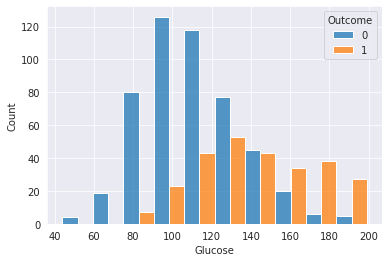

In [88]:
sns.histplot(data=df, x="Glucose",bins=10,hue='Outcome',multiple='dodge')

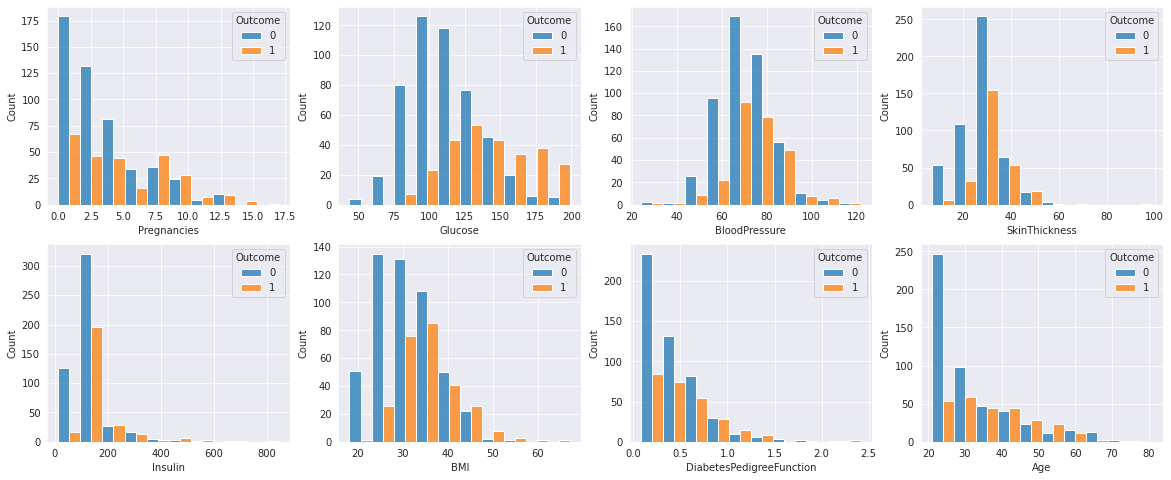

In [93]:


fig, axs = plt.subplots(2, 4, figsize=(20, 8))



sns.histplot(data=df, x="Pregnancies",bins=10,hue='Outcome',multiple='dodge',ax=axs[0,0])
sns.histplot(data=df, x="Glucose",bins=10,hue='Outcome',multiple='dodge',ax=axs[0,1])
sns.histplot(data=df, x="BloodPressure",bins=10,hue='Outcome',multiple='dodge',ax=axs[0,2])
sns.histplot(data=df, x="SkinThickness",bins=10,hue='Outcome',multiple='dodge',ax=axs[0,3])
sns.histplot(data=df, x="Insulin",bins=10,hue='Outcome',multiple='dodge',ax=axs[1,0])
sns.histplot(data=df, x="BMI",bins=10,hue='Outcome',multiple='dodge',ax=axs[1,1])
sns.histplot(data=df, x="DiabetesPedigreeFunction",bins=10,hue='Outcome',multiple='dodge',ax=axs[1,2])
sns.histplot(data=df, x="Age",bins=10,hue='Outcome',multiple='dodge',ax=axs[1,3])








plt.show()

Observation:

*   Pregnancy is lower in negative patients
*   Glucose is higher in positve patients compared to negative patients
*   As skin thickness increases, count of positive patients increases
*   As BMI increases, count of positive patients increases










/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


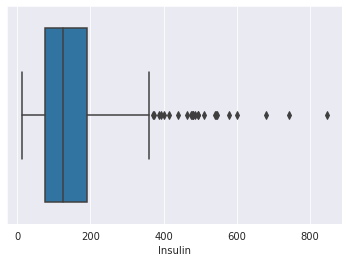

In [ ]:
#check distribution of insulin
sns.boxplot(df['Insulin'])

Observation: The variables Glucose, Blood Pressure, BMI, Skin Thickness are distributed normally. So we'd replace the na values with mean.

In case of Insulin, the distribution is left skewed. So we'd replace the na values with median for this column

# 4. Missing Value Treatment Based on Observation

In [ ]:
#replace missing value for insulin with median
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].median())

In [ ]:
col_na_means=['Glucose', 'BloodPressure', 'SkinThickness','BMI']

In [ ]:
df[cols_null_zero].mean()

Glucose          121.686763
BloodPressure     72.405184
SkinThickness     29.153420
Insulin          140.671875
BMI               32.457464
dtype: float64

In [ ]:
#replace other missing values in columns with mean
df[col_na_means] = df[col_na_means].fillna(df[col_na_means].mean())

In [ ]:
#check number of null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# 5.Check data imbalance and handling data imbalance

In [ ]:
#check value counts of target 
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

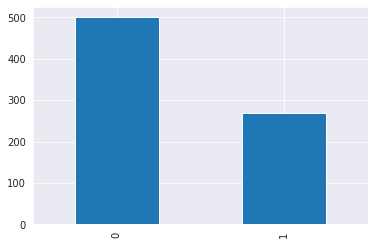

In [27]:
#visualisation of cl
df['Outcome'].value_counts().plot(kind='bar')

It can be seen that there is data imbalance. We'd handle the same using smote based techniques

## 5A.Handling class imbalance using SMOTE based techniques

In [30]:
#import libraries
from collections import Counter
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE

In [28]:
#separate x and y
df_X = df.drop('Outcome', axis=1)
df_y = df['Outcome']
print(df_X.shape, df_y.shape)

(768, 8) (768,)


In [31]:
#handling imbalance
counter = Counter(df_y)
print('Before',counter)
#Implement SMOTE for Class Imbalance
sm = SMOTE()
# transform the dataset
df_X_resampled, df_y_resampled = SMOTE(random_state=108).fit_resample(df_X, df_y)
print(df_X_resampled.shape, df_y_resampled.shape)
counter = Counter(df_y_resampled)
print('After',counter)

Before Counter({0: 500, 1: 268})
(1000, 8) (1000,)
After Counter({1: 500, 0: 500})


1    500
0    500
Name: Outcome, dtype: int64

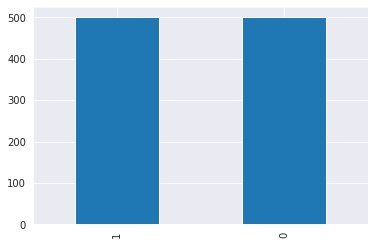

In [32]:
#check after resampling
df_y_resampled.value_counts().plot(kind='bar')
df_y_resampled.value_counts()

In [33]:
#create dataset after resampling
df_resampled = pd.concat([df_X_resampled, df_y_resampled], axis=1)
df_resampled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.000000,72.000000,35.000000,125.000000,33.600000,0.627000,50,1
1,1,85.000000,66.000000,29.000000,125.000000,26.600000,0.351000,31,0
2,8,183.000000,64.000000,29.153420,125.000000,23.300000,0.672000,32,1
3,1,89.000000,66.000000,23.000000,94.000000,28.100000,0.167000,21,0
4,0,137.000000,40.000000,35.000000,168.000000,43.100000,2.288000,33,1
...,...,...,...,...,...,...,...,...,...
995,3,164.686765,74.249021,29.153420,125.000000,42.767110,0.726091,29,1
996,0,138.913540,69.022720,27.713033,127.283849,39.177649,0.703702,24,1
997,10,131.497740,66.331574,33.149837,125.000000,45.820819,0.498032,38,1
998,0,105.571347,83.238205,29.153420,125.000000,27.728596,0.649204,60,1


## 5B. Visualisation 

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 <a list of 6 Text major ticklabel objects>)

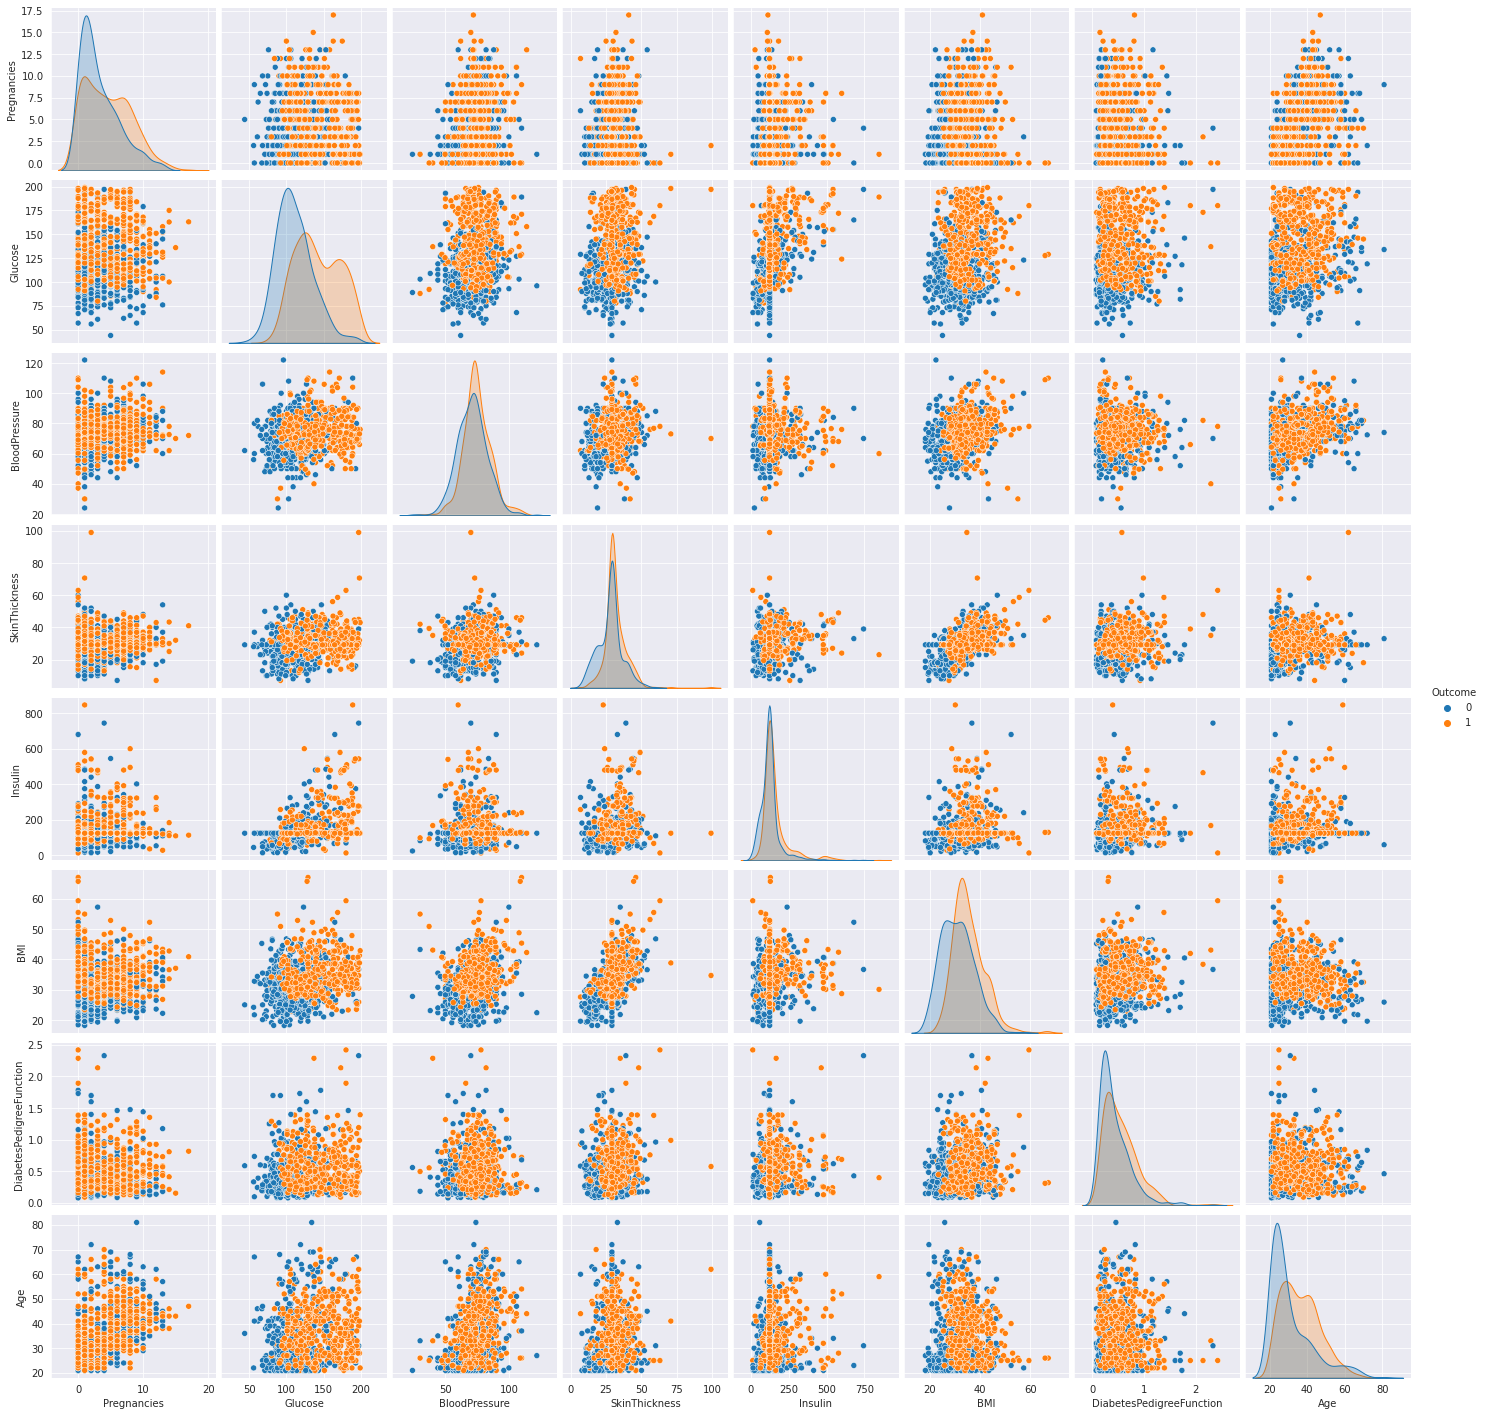

In [34]:
#pairplot to check relations between variables
sns.pairplot(data=df_resampled, hue='Outcome')
plt.xticks(fontsize = 50)

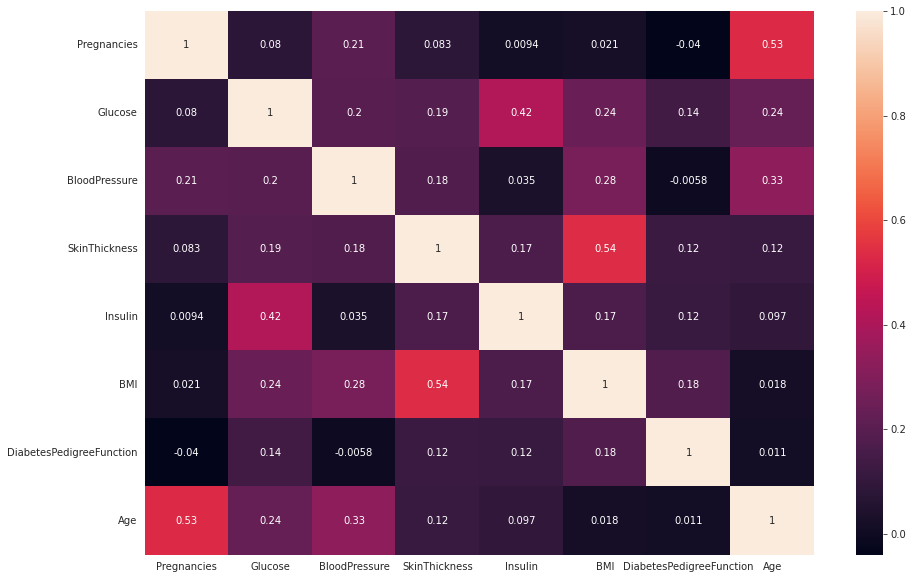

In [35]:
#plot correlation matrix to check correlation amoung feature variables
plt.figure(figsize=(15,10))
sns.heatmap(df_X_resampled.corr(), annot=True);

Observation: It can be seen that none of the feature variables are highly correlated. So we can conclude that there is no multicollinearity issue

# 6.Data Pre-processing for Model Building

#### 6A. Train Test Split

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df_X_resampled,df_y_resampled,test_size=0.30,random_state=10)

In [37]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(700, 8)
(300, 8)
(700,)
(300,)


#### 6B. Scaling the data to bring them in same scale 

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Observation/Note:

As this is a healthcare related prediction, it is important that the model identifies all of the positive patients correctly. Hence, we should look to increase the recall score/sensitivity 

# 7. Model Building

###### Function to evaluate model:

In [42]:
def evaluate_model(classifier):
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, classifier.predict(x_train)))
    print("Train Accuracy :", accuracy_score(y_train, classifier.predict(x_train)))
    
    
    confusion1=confusion_matrix(y_train, classifier.predict(x_train))
    TP1 = confusion1[1,1] # true positive 
    TN1 = confusion1[0,0] # true negatives
    FP1 = confusion1[0,1] # false positives
    FN1 = confusion1[1,0] # false negatives
    # Let's see the sensitivity of model
    recall1=TP1 / float(TP1+FN1)
    # Let us calculate specificity
    precision1=TP1 / float(TP1+FP1)
    print('Train Precision:', precision1)
    print('Train Recall:', recall1)
    print("-"*50)
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, classifier.predict(x_test)))
    print("Test Accuracy :", accuracy_score(y_test, classifier.predict(x_test)))
    print("Test Precision :",precision_score(y_test,classifier.predict(x_test)))
    print("Test Recall :",recall_score(y_test,classifier.predict(x_test)))
    print("Precision : Probability that a predicted yes is actually yes")
    print("Recall : Probability that an actual yes is correctly predicted")

    print("ROC Curve:")
    plot_roc_curve(classifier, x_test, y_test)
    plt.show()

## 7A. KNN Classifier

### 7A.1 Using simple classifier

In [40]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(x_train, y_train)

KNeighborsClassifier()

Train Confusion Matrix:
[[275  86]
 [ 30 309]]
Train Accuracy : 0.8342857142857143
Train Precision: 0.7822784810126582
Train Recall: 0.911504424778761
--------------------------------------------------
Test Confusion Matrix:
[[ 94  45]
 [ 22 139]]
Test Accuracy : 0.7766666666666666
Test Precision : 0.7554347826086957
Test Recall : 0.8633540372670807
Precision : Probability that a predicted yes is actually yes
Recall : Probability that an actual yes is correctly predicted
ROC Curve:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


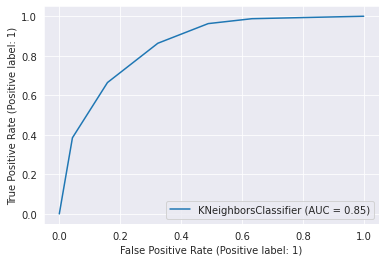

In [43]:
#evaluate model performance
evaluate_model(classifier)

### 7A.2 Hyperparameter tuning for KNN

In [44]:
#set parameters and fit model
n_neighbors = list(range(1,30))
clf_knn = KNeighborsClassifier( p = 2)
parameters = {
    'n_neighbors': n_neighbors
}
grid_search_knn = GridSearchCV(estimator=clf_knn,
                           param_grid=parameters,
                           cv = 5,
                           n_jobs=-1, verbose=1,scoring='recall')

grid_search_knn.fit(x_train, y_train)

Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]},
             scoring='recall', verbose=1)

KNeighborsClassifier(n_neighbors=29)
Train Confusion Matrix:
[[247 114]
 [ 40 299]]
Train Accuracy : 0.78
Train Precision: 0.7239709443099274
Train Recall: 0.8820058997050148
--------------------------------------------------
Test Confusion Matrix:
[[ 93  46]
 [ 21 140]]
Test Accuracy : 0.7766666666666666
Test Precision : 0.7526881720430108
Test Recall : 0.8695652173913043
Precision : Probability that a predicted yes is actually yes
Recall : Probability that an actual yes is correctly predicted
ROC Curve:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


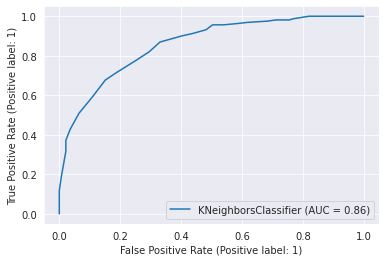

In [45]:
#get best estimator and fit model and evaluate performance
knn_best = grid_search_knn.best_estimator_
print(knn_best)

evaluate_model(knn_best)

## 7B.Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier

### 7B.1 Using simple classifier

Train Confusion Matrix:
[[361   0]
 [  0 339]]
Train Accuracy : 1.0
Train Precision: 1.0
Train Recall: 1.0
--------------------------------------------------
Test Confusion Matrix:
[[108  31]
 [ 29 132]]
Test Accuracy : 0.8
Test Precision : 0.8098159509202454
Test Recall : 0.8198757763975155
Precision : Probability that a predicted yes is actually yes
Recall : Probability that an actual yes is correctly predicted
ROC Curve:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


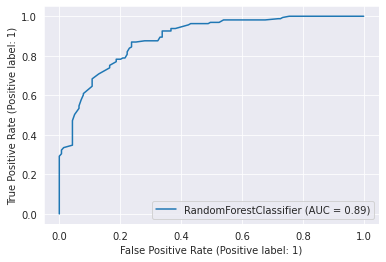

In [48]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
evaluate_model(rf)

### 7B.2 Hyperparameter Tuning for RandomForest and evaluate performace

In [49]:
rf = RandomForestClassifier()
#set params
params = {
    'max_depth': [5,8,12,20,30],
    'min_samples_leaf': [3,6,10,15],
    
}

#cross validation
grid_search_rf = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 5,
                           n_jobs=-1, verbose=1, scoring='recall')

grid_search_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 8, 12, 20, 30],
                         'min_samples_leaf': [3, 6, 10, 15]},
             scoring='recall', verbose=1)

RandomForestClassifier(max_depth=5, min_samples_leaf=3)
Train Confusion Matrix:
[[290  71]
 [ 32 307]]
Train Accuracy : 0.8528571428571429
Train Precision: 0.8121693121693122
Train Recall: 0.9056047197640118
--------------------------------------------------
Test Confusion Matrix:
[[106  33]
 [ 24 137]]
Test Accuracy : 0.81
Test Precision : 0.8058823529411765
Test Recall : 0.8509316770186336
Precision : Probability that a predicted yes is actually yes
Recall : Probability that an actual yes is correctly predicted
ROC Curve:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


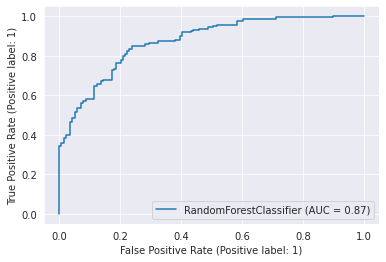

In [50]:
#best estimator and evaluate performace
rf_best = grid_search_rf.best_estimator_
print(rf_best)

evaluate_model(rf_best)

# 7C. Logistic Regression

### 7C.1 Simple Classifier

Train Confusion Matrix:
[[287  74]
 [110 229]]
Train Accuracy : 0.7371428571428571
Train Precision: 0.7557755775577558
Train Recall: 0.6755162241887905
--------------------------------------------------
Test Confusion Matrix:
[[110  29]
 [ 47 114]]
Test Accuracy : 0.7466666666666667
Test Precision : 0.7972027972027972
Test Recall : 0.7080745341614907
Precision : Probability that a predicted yes is actually yes
Recall : Probability that an actual yes is correctly predicted
ROC Curve:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


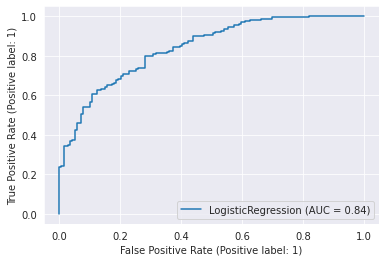

In [51]:
lr = LogisticRegression()
#Fit Model
lr.fit(x_train,y_train)

evaluate_model(lr)

### 7C.2 Hyperparameter Tuning for logistic regression

In [52]:
params_lr = {
    'C': [0.01,0.1,0.5,2,10,100],
    "penalty": ["l1", "l2"],
    'solver' : ['liblinear','lbfgs'],
    'max_iter' : [100, 500, 1000]
}

grid_lr = GridSearchCV(estimator=lr,param_grid=params_lr,cv = 5,verbose=1,scoring='recall',n_jobs=-1)

grid_lr.fit(x_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
90 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 0.5, 2, 10, 100],
                         'max_iter': [100, 500, 1000], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='recall', verbose=1)

LogisticRegression(C=0.5, solver='liblinear')
Train Confusion Matrix:
[[287  74]
 [110 229]]
Train Accuracy : 0.7371428571428571
Train Precision: 0.7557755775577558
Train Recall: 0.6755162241887905
--------------------------------------------------
Test Confusion Matrix:
[[109  30]
 [ 47 114]]
Test Accuracy : 0.7433333333333333
Test Precision : 0.7916666666666666
Test Recall : 0.7080745341614907
Precision : Probability that a predicted yes is actually yes
Recall : Probability that an actual yes is correctly predicted
ROC Curve:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


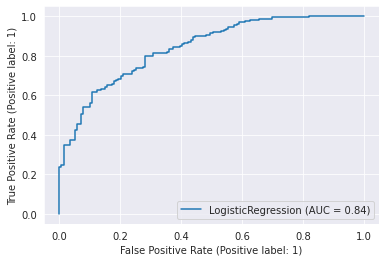

In [53]:
# With best parameters
lr_best = grid_lr.best_estimator_
print(lr_best)
lr_best.fit(x_train,y_train)
evaluate_model(lr_best)


## 7D. XGBoost

### 7D.1 Simple XGBoost Classifier 

In [54]:
xgb_cl = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')
xgb_cl.fit(x_train, y_train)

XGBClassifier(n_jobs=-1)

Train Confusion Matrix:
[[316  45]
 [ 22 317]]
Train Accuracy : 0.9042857142857142
Train Precision: 0.8756906077348067
Train Recall: 0.9351032448377581
--------------------------------------------------
Test Confusion Matrix:
[[103  36]
 [ 28 133]]
Test Accuracy : 0.7866666666666666
Test Precision : 0.7869822485207101
Test Recall : 0.8260869565217391
Precision : Probability that a predicted yes is actually yes
Recall : Probability that an actual yes is correctly predicted
ROC Curve:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


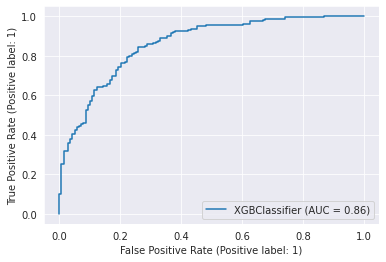

In [55]:
evaluate_model(xgb_cl)

### 7D.2 Hyperparameter tuning for XGBoost

In [56]:
# A parameter grid for XGBoost
params = {
        'n_estimators' : [10,20,50], # no of trees 
        'learning_rate' : [0.01,0.05, 0.1],  # eta
        'min_child_weight': [1, 5,10],
        'gamma': [0.1, 0.5, 1, 5],
        'max_depth': [3, 5, 7]
        }




# Grid search cross validation with 4 folds for Hyperparameter tuning:
grid_xgb = GridSearchCV(
        xgb_cl,
        param_grid=params,
        scoring='recall',
        n_jobs=-1,
        cv=4, verbose=1)

grid_xgb.fit(x_train,y_train)

Fitting 4 folds for each of 324 candidates, totalling 1296 fits


GridSearchCV(cv=4, estimator=XGBClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'gamma': [0.1, 0.5, 1, 5],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 5, 10],
                         'n_estimators': [10, 20, 50]},
             scoring='recall', verbose=1)

XGBClassifier(gamma=0.1, learning_rate=0.01, n_estimators=10, n_jobs=-1)
Train Confusion Matrix:
[[233 128]
 [ 33 306]]
Train Accuracy : 0.77
Train Precision: 0.7050691244239631
Train Recall: 0.9026548672566371
--------------------------------------------------
Test Confusion Matrix:
[[ 87  52]
 [ 22 139]]
Test Accuracy : 0.7533333333333333
Test Precision : 0.7277486910994765
Test Recall : 0.8633540372670807
Precision : Probability that a predicted yes is actually yes
Recall : Probability that an actual yes is correctly predicted
ROC Curve:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


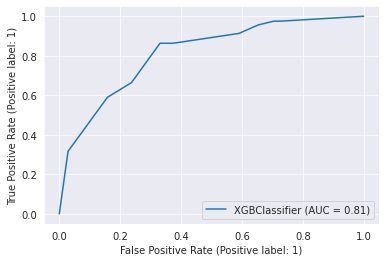

In [57]:
# With best parameters
xgb_best = grid_xgb.best_estimator_
print(xgb_best)
xgb_best.fit(x_train,y_train)
evaluate_model(xgb_best)

# Conclusion:

From the above it can be conclude that Random Forest Classifier is the best model in this case. It has high training as well as testing accuracy. Also the Recall score is high in case of both training and testing are high

In [79]:
#create a dataframe having importance of each columns
imp_df = pd.DataFrame({
    "Varname": df_X_resampled.columns,
    "Imp": rf_best.feature_importances_
})

The predictor  variables and their importance is give as below:

In [81]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
1,Glucose,0.344397
5,BMI,0.200319
7,Age,0.143804
4,Insulin,0.097826
6,DiabetesPedigreeFunction,0.078671
3,SkinThickness,0.055962
0,Pregnancies,0.040362
2,BloodPressure,0.038658
